In [4]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
%autoreload 2

In [3]:
import sys
sys.version

'3.10.6 (tags/v3.10.6:9c7b4bd, Aug  1 2022, 21:53:49) [MSC v.1932 64 bit (AMD64)]'

In [1]:
from nn.NeuralNet import NN
from layers.FullyConnected import FC
from layers.Flatten import Flatten
from layers.activations.relu import Relu
from layers.Convolution import Conv
from layers.BatchNormalization import BatchNorm
from layers.Pool.MaxPool import MaxPool
from layers.Dropout import Dropout
from loss_functions.softmax_with_cross_entropy import SoftmaxCrossEntropy
from optimizers.adam import Adam
from optimizers.momentum import Momentum

import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
%matplotlib inline

In [2]:
# Load Mnist dataset
(trainingImages, trainingLabels), (testImages, testLabels) = datasets.mnist.load_data()

In [3]:
def showRandomImage(trainingImages):
    i = np.random.randint(trainingImages.shape[0])
    plt.imshow(trainingImages[i],cmap=plt.get_cmap('gray'))

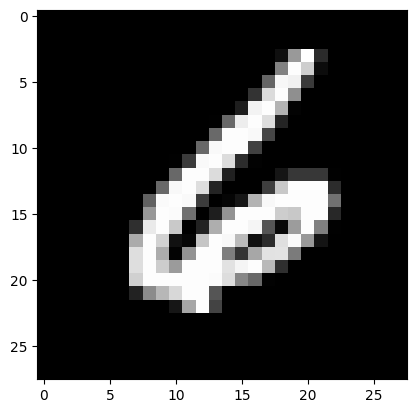

In [4]:
showRandomImage(trainingImages)

In [5]:
# Normalize Image
trainingImages =  trainingImages.astype(np.float32) / 255

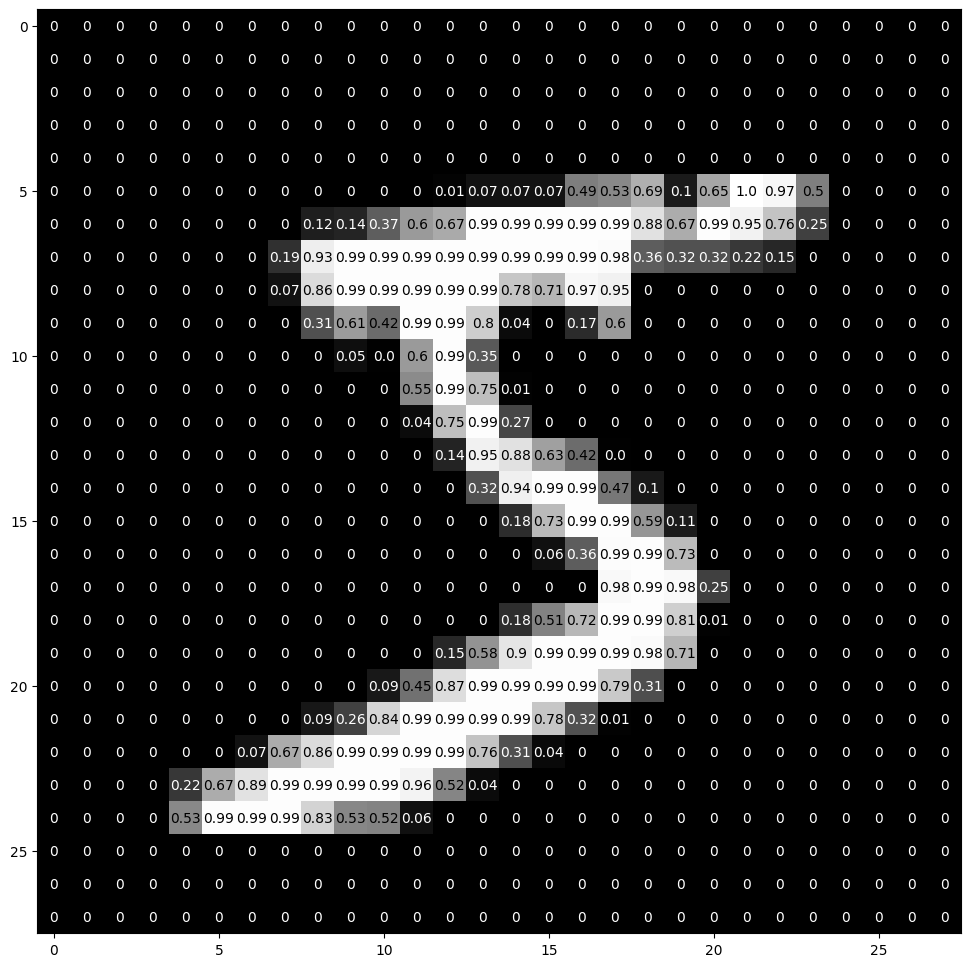

In [6]:
# View an Image in more details
img = np.squeeze(trainingImages[0])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [7]:
#Create model to train network
batch_size = 128
import cupy as cp
trainingImages = cp.array(trainingImages)
trainingLabels = cp.array(trainingLabels)

layers = [
    Flatten(),
    FC(784, 500),
    Relu(),
    Dropout(0.5),
    FC(500, 100),
    Relu(),
    Dropout(0.5),
    FC(100,10)
]

model = NN(layers, SoftmaxCrossEntropy(), Adam())

In [8]:
# Train Model
learning_rate = lambda epoch: 0.0001 if epoch > 10 else 0.001
loss, validation_loss, validation_accuracy = model.train(trainingImages, trainingLabels, 0.2, batch_size, 20, learning_rate, 1)

The validation loss is  0.18987727  Accuracy:  94.15
The loss after  1  iterations, learning rate is 0.001 iterations is  0.51065296  using  6.275151099998766
The validation loss is  0.13429515  Accuracy:  95.74166666666666
The loss after  2  iterations, learning rate is 0.001 iterations is  0.2237733  using  8.482418499999767
The validation loss is  0.10761144  Accuracy:  96.63333333333334
The loss after  3  iterations, learning rate is 0.001 iterations is  0.16832097  using  10.645022400000016
The validation loss is  0.096436225  Accuracy:  97.03333333333333
The loss after  4  iterations, learning rate is 0.001 iterations is  0.14177115  using  12.723936499998672
The validation loss is  0.09167233  Accuracy:  97.20833333333333
The loss after  5  iterations, learning rate is 0.001 iterations is  0.122611105  using  14.827265500000067
The validation loss is  0.086885184  Accuracy:  97.225
The loss after  6  iterations, learning rate is 0.001 iterations is  0.10862283  using  16.9620159

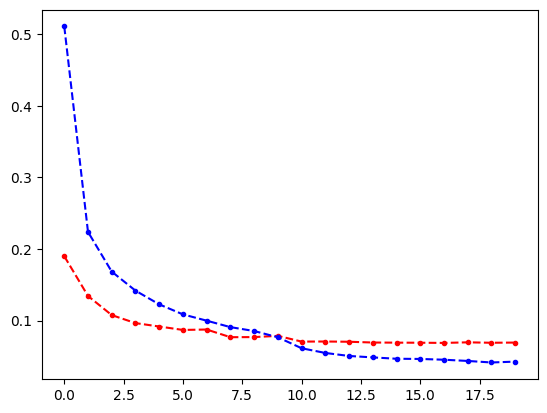

In [13]:
validation_numpy = list(map(lambda loss: cp.asnumpy(loss), validation_loss))
loss_numpy = list(map(lambda l: cp.asnumpy(l),loss))
plt.plot(validation_numpy, 'r', linestyle="--", marker=".")
plt.plot(loss_numpy, 'b', linestyle = "--", marker=".")
plt.show()

TypeError: Implicit conversion to a NumPy array is not allowed. Please use `.get()` to construct a NumPy array explicitly.

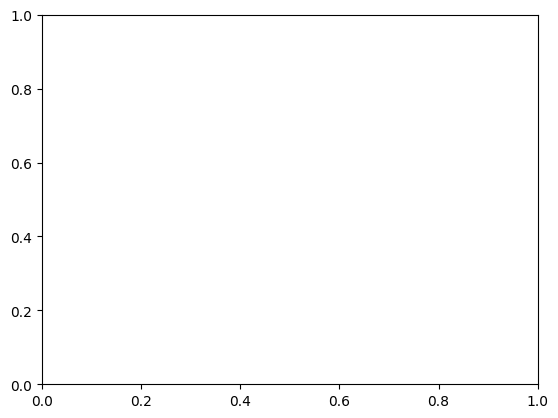

In [14]:
plt.plot(validation_accuracy)

#CIFAR-10 

In [4]:
(trainingImages, trainingLabels), (testImages, testLabels) = datasets.cifar10.load_data()
trainingLabels = trainingLabels.reshape(-1)
testLabels = testLabels.reshape(-1)

In [5]:
np.max(trainingImages[1])

254

In [6]:
trainingImages = trainingImages.astype(np.float32) / 255
testImages = testImages.astype(np.float32) / 255

In [7]:
trainingImages[0] = np.flip(trainingImages[0], 0)

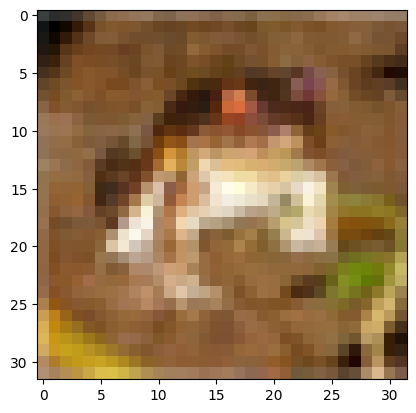

In [7]:
showRandomImage(trainingImages[:1])

In [8]:
trainingImages = (trainingImages - 0.5)/0.5
testImages = (testImages - 0.5)/0.5

In [9]:
import cupy as cp


trainingImages = cp.array(trainingImages)
trainingLabels = cp.array(trainingLabels)
testImages = cp.array(testImages)
testLabels = cp.array(testLabels)

In [10]:
# create the model
batch_size = 128

layers = [
    Conv(3,16,(3,3), padding=1),
    BatchNorm(16),
    Relu(),
    MaxPool(2,2),
    Conv(16, 32, (3,3), padding=1),
    BatchNorm(32),
    Relu(),
    # Dropout(0.75),
    Conv(32, 64, (3,3), padding=1),
    BatchNorm(64),
    Relu(),
    MaxPool(2,2),
    Conv(64, 64, (3,3), padding=1),
    BatchNorm(64),
    Relu(),
    Conv(64,128, (3,3), padding=1),
    BatchNorm(128),
    Relu(),
    MaxPool(2,2),
    Flatten(),
    Dropout(0.5),
    FC(128*4*4, 500),
    BatchNorm(500),
    Relu(),
    Dropout(0.5),
    FC(500, 10),
]


model = NN(layers, SoftmaxCrossEntropy(), Adam())

In [11]:
learning_rate = lambda epoch: 0.001 if epoch < 80 else 0.0001
loss, validation_loss, validation_accuracy = model.train(trainingImages, trainingLabels, 0.2, batch_size, 3, learning_rate)

The validation loss is  1.1118913  Accuracy:  59.78
The loss after  1  iterations, learning rate is 0.001 iterations is  1.3459641  using  77.37537470000098
The validation loss is  0.9103363  Accuracy:  68.1
The loss after  2  iterations, learning rate is 0.001 iterations is  0.99503213  using  149.34173700000247
The validation loss is  0.87515897  Accuracy:  69.82
The loss after  3  iterations, learning rate is 0.001 iterations is  0.86043525  using  220.85766879999937


In [32]:
# Release memory
del trainingImages, trainingLabels
cp._default_memory_pool.free_all_blocks()

In [31]:
validation_loss

[array(3.485873, dtype=float32),
 array(3.6848946, dtype=float32),
 array(3.3811288, dtype=float32),
 array(2.8171248, dtype=float32),
 array(3.0071661, dtype=float32),
 array(2.5321245, dtype=float32),
 array(2.5758808, dtype=float32),
 array(2.5291812, dtype=float32),
 array(2.9496958, dtype=float32),
 array(2.3905306, dtype=float32)]

In [24]:
model.getValidationStats(trainingImages, trainingLabels, 128)

(array(0.205055, dtype=float32), array(94.572))

In [2]:
import torch.nn as nn
import torch
import cupy as cp

In [14]:
inp = np.array([0.1,0.2,0.6,0.7,0.9,0.4, 0.8])
(inp < 0.2) / 0.2

array([5., 0., 0., 0., 0., 0., 0.])

In [13]:
def printThis(x: str):
  print(x)

printThis(34)


34


In [23]:
cp.random.rand(10,) < 0.5

array([False, False,  True, False, False, False,  True,  True, False,
        True])

In [15]:
train.shape

NameError: name 'train' is not defined

In [34]:
np.max(label)

99

In [10]:
a = cp.array([2,3,4])
all = cp.sum(a) / 2
all.astype(cp.float32)

array(4.5, dtype=float32)

In [19]:
pool = nn.MaxPool2d(2, 2)

In [ ]:
before = np.array([[[[2, 0],
   [5, 7],
   [1, 9],
   [1, 6]],

  [[1, 6],
   [8, 1],
   [5, 7],
   [3, 4]],

  [[6, 1],
   [8, 8],
   [7, 7],
   [5, 6]]]])
before.shape

In [ ]:
# x = np.transpose(before, (0,2,3,1))
x = np.random.randint(20, size=(1,2,2,3))
torch_x = torch.Tensor(np.transpose(x, (0,3,1,2)))
torch_x.requires_grad_()
cp_x = cp.array(x)
# print(torch_x)

In [ ]:
m = MaxPool((x.shape[1:]), 2,2)

In [ ]:
torch_ans = pool(torch_x)
torch_ans.retain_grad()
# print(torch_ans.shape)
# print(torch_ans)
print()
# final_ans = np.int32(np.transpose(torch_ans.numpy(), (0,2,3,1)))
# print(final_ans.shape)
# final_ans

In [ ]:
max_torch = m.forward_pass(cp_x).get()
print(max_torch.shape)
# max_torch

In [ ]:
cp_ans = m.backward_pass(cp.ones((1,1,1,3)))

In [ ]:
cp_ans = cp_ans.transpose(0,3,1,2)
print(cp_x.transpose(0,3,1,2))
# print(max_torch.transpose(0,3,1,2))
print(cp_ans)

In [ ]:
summation = torch.sum(torch_ans)

In [ ]:
summation.backward()

In [ ]:
print(torch_x.grad)
print(torch_x)
# torch_ans.shape

In [19]:
x = np.array([[0.003, 3, 8, 14], [0.01, 0.1, 3, 10]])
exp_x = np.exp(x)

print(exp_x)

exp_x/np.sum(exp_x, axis=1, keepdims=True)

[[1.00300450e+00 2.00855369e+01 2.98095799e+03 1.20260428e+06]
 [1.01005017e+00 1.10517092e+00 2.00855369e+01 2.20264658e+04]]


array([[8.31950264e-07, 1.66601124e-05, 2.47257991e-03, 9.97509928e-01],
       [4.58100341e-05, 5.01241613e-05, 9.10963793e-04, 9.98993102e-01]])

In [20]:
p = x - np.max(x, axis=1, keepdims=True)
exp_p = np.exp(p)

print(exp_p)

exp_p/np.sum(exp_p, axis=1, keepdims=True)

[[8.34027051e-07 1.67017008e-05 2.47875218e-03 1.00000000e+00]
 [4.58562066e-05 5.01746821e-05 9.11881966e-04 1.00000000e+00]]


array([[8.31950264e-07, 1.66601124e-05, 2.47257991e-03, 9.97509928e-01],
       [4.58100341e-05, 5.01241613e-05, 9.10963793e-04, 9.98993102e-01]])

In [11]:
a = np.random.randint(1,9, size=(4,3))

In [19]:
b = cp.asarray(a)

'cupy'

In [18]:
a

array([[7, 6, 3],
       [5, 8, 2],
       [5, 6, 2],
       [7, 4, 2]])